# Optum Stratethon Season 3

## Team Runtime-Terror: Members: Kshitiz Priyam, Shruti Bibra(Team Leader) & Kashish Goswami 

### Based on Medications Database(Base Cost & Payer Coverage)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Get the training data
urlx = "https://raw.githubusercontent.com/kshitizpriyam/OptumDatabaseTeamRuntime-Terror/main/Medication%20x-axis(base%20cost).csv"
dfx = pd.read_csv(urlx)
urly = "https://raw.githubusercontent.com/kshitizpriyam/OptumDatabaseTeamRuntime-Terror/main/Medication%20y-axis(payer%20coverage).csv"
dfy = pd.read_csv(urly)

dfx = dfx.values
dfy = dfy.values

x = dfx.reshape((-1,1))
y = dfy.reshape((-1,1))

print(x.shape, y.shape)
print(x)

(42989, 1) (42989, 1)
[[677.08]
 [624.09]
 [ 43.32]
 ...
 [263.49]
 [263.49]
 [263.49]]


## Data Pre Processing & Visualization

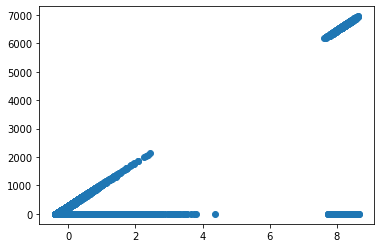

In [2]:
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

## Gradient Descent Algorithm

In [3]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [4]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error 

In [5]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2, ))
    for i in range(X.shape[0]):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]
        
        
    return grad

In [6]:
def gradientDescent(X,Y,learning_rate=0.001):
    
    #random theta
    theta = np.array([-2.0,0.0])
    
    
    itr=0
    max_iteration = 100
    
    error_list = []
    theta_list = []
    while(itr<=max_iteration):
        grad = gradient(X,Y,theta)
        err = error(X,Y,theta)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr =  itr + 1
        
    return theta,error_list,theta_list

final_theta, error_list, theta_list = gradientDescent(X,Y)

C:\Users\HPCL\AppData\Local\Temp/ipykernel_21396/3368909432.py:6: RuntimeWarning: overflow encountered in add
  error += (hx - Y[i])**2
C:\Users\HPCL\AppData\Local\Temp/ipykernel_21396/3368909432.py:6: RuntimeWarning: overflow encountered in square
  error += (hx - Y[i])**2


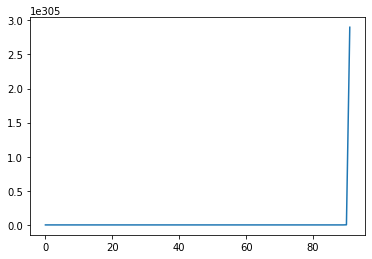

In [7]:
plt.plot(error_list)
plt.show()   

In [8]:
print(final_theta)

[1.28523450e+166 4.23281295e+166]


In [9]:
#Plot the line for testing data
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


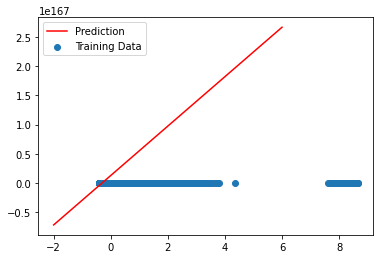

In [10]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest, hypothesis(xtest, final_theta), color = 'red', label="Prediction")
plt.legend()
plt.show()